In [1]:
 import sys
 print(sys.executable)
 print(sys.version)
 print(sys.version_info)
# tested on aws lightsail instance 21 July 2020 using python38 kernel spec

/opt/jupyterhub/bin/python3
3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [2]:
import requests # Module to process http/https requests
import pandas as pd

In [3]:
remote_url="http://54.243.252.9/ce-3354-webroot/hydrohandbook/chapters/03-infiltration/all_quads_gross_evaporation.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
import pandas as pd # Module to process dataframes (not absolutely needed but somewhat easier than using primatives, and gives graphing tools)

In [4]:
evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf
evapdf.head() # check structure

,YYYY-MM,104,105,106,107,108,204,205,206,207,...,911,912,1008,1009,1010,1011,1108,1109,1110,1210
0,1954-01-01,1.80,1.80,2.02,2.24,2.24,2.34,1.89,1.80,1.99,...,1.42,1.30,2.50,2.42,1.94,1.29,2.59,2.49,2.22,2.27
1,1954-02-01,4.27,4.27,4.13,3.98,3.90,4.18,4.26,4.27,4.26,...,2.59,2.51,4.71,4.30,3.84,2.50,5.07,4.62,4.05,4.18
2,1954-03-01,4.98,4.98,4.62,4.25,4.20,5.01,4.98,4.98,4.68,...,3.21,3.21,6.21,6.06,5.02,3.21,6.32,6.20,5.68,5.70
3,1954-04-01,6.09,5.94,5.94,6.07,5.27,6.31,5.98,5.89,5.72,...,3.83,3.54,6.45,6.25,4.92,3.54,6.59,6.44,5.88,5.95
4,1954-05-01,5.41,5.09,5.14,4.40,3.61,5.57,4.56,4.47,4.18,...,3.48,3.97,7.92,8.13,6.31,3.99,7.75,7.98,7.40,7.40


<Axes: xlabel='YYYY-MM'>

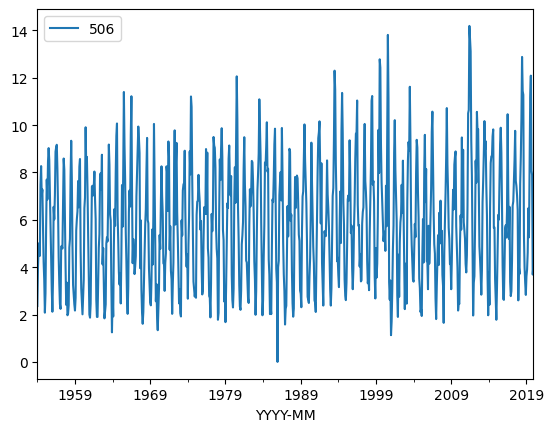

In [5]:
evapdf.plot.line(x='YYYY-MM',y='506') # Plot quadrant 911 evaporation time series 

count    792.000000
mean       5.858346
std        2.562598
min        0.000000
25%        3.710000
50%        5.750000
75%        7.740000
max       14.190000
Name: 506, dtype: float64

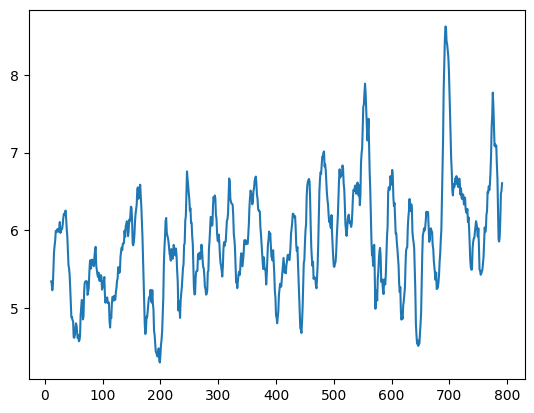

In [6]:
movingAvg=evapdf['506'].rolling(12, win_type ='boxcar').mean()
movingAvg
movingAvg.plot.line(x='YYYY-MM',y='506')
evapdf['YYYY-MM'][375]
evapdf['506'].describe()

In [7]:
evB485loc = evapdf['YYYY-MM']<'1985-04'  # filter before 1985
evB485 = evapdf[evB485loc]
ev85uploc = evapdf['YYYY-MM']>='1985-04' # filter after 1985
ev85up= evapdf[ev85uploc]
print(evB485.head())
print(ev85up.head())

     YYYY-MM   104   105   106   107   108   204   205   206   207  ...   911  \
0 1954-01-01  1.80  1.80  2.02  2.24  2.24  2.34  1.89  1.80  1.99  ...  1.42   
1 1954-02-01  4.27  4.27  4.13  3.98  3.90  4.18  4.26  4.27  4.26  ...  2.59   
2 1954-03-01  4.98  4.98  4.62  4.25  4.20  5.01  4.98  4.98  4.68  ...  3.21   
3 1954-04-01  6.09  5.94  5.94  6.07  5.27  6.31  5.98  5.89  5.72  ...  3.83   
4 1954-05-01  5.41  5.09  5.14  4.40  3.61  5.57  4.56  4.47  4.18  ...  3.48   

    912  1008  1009  1010  1011  1108  1109  1110  1210  
0  1.30  2.50  2.42  1.94  1.29  2.59  2.49  2.22  2.27  
1  2.51  4.71  4.30  3.84  2.50  5.07  4.62  4.05  4.18  
2  3.21  6.21  6.06  5.02  3.21  6.32  6.20  5.68  5.70  
3  3.54  6.45  6.25  4.92  3.54  6.59  6.44  5.88  5.95  
4  3.97  7.92  8.13  6.31  3.99  7.75  7.98  7.40  7.40  

[5 rows x 93 columns]
       YYYY-MM   104    105    106   107   108   204    205    206   207  ...  \
375 1985-04-01  5.31   6.27   6.75  6.92  4.76  5.32   6.72  

In [8]:
evB485['911'].describe()

count    375.000000
mean       4.202480
std        1.774273
min        1.260000
25%        2.665000
50%        3.900000
75%        5.455000
max        8.800000
Name: 911, dtype: float64

In [9]:
ev85up['911'].describe()

count    417.000000
mean       4.167458
std        1.676704
min        1.230000
25%        2.680000
50%        4.160000
75%        5.410000
max        9.560000
Name: 911, dtype: float64

<Axes: >

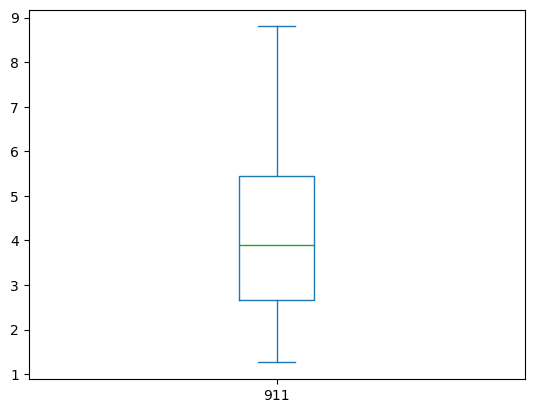

In [10]:
evB485['911'].plot.box()

<Axes: >

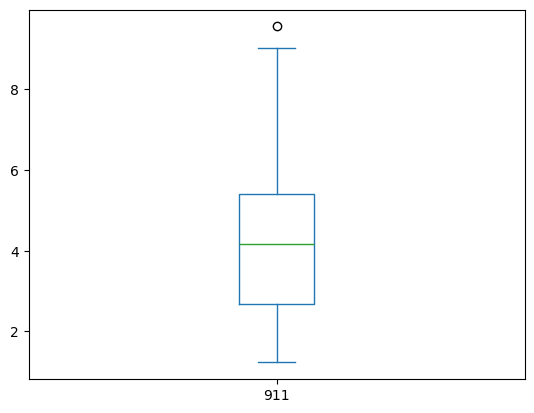

In [11]:
ev85up['911'].plot.box()

In [12]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(evB485['911'],ev85up['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

statistic=78190.500, p-value at rejection =0.999
Probably the same distribution


In [13]:
stat, p = mannwhitneyu(evB485['911'],evB485['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

statistic=70312.500, p-value at rejection =1.000
Probably the same distribution


In [14]:
evB492loc = evapdf['YYYY-MM']<'1992'  # filter before 1992
evB492 = evapdf[evB492loc]
ev92uploc = evapdf['YYYY-MM']>='1992' # filter after 1992
ev92up= evapdf[ev92uploc]
#print(evB492.head())
#print(ev92up.head())

In [15]:
stat, p = mannwhitneyu(evB492['911'],ev92up['911'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

statistic=81021.000, p-value at rejection =0.166
Probably the same distribution
